In [68]:
import numpy as np
import pandas as pd
import statistics
import statsmodels
import statsmodels.api as sm
import matplotlib.pyplot as plt
pd.set_option('display.expand_frame_repr', False)
import plotly.graph_objects as go
import statsmodels.formula.api as smf 

In [69]:
ser = pd.Series(np.random.random(5), name = "Column 01")

In [70]:
ser

0    0.887934
1    0.208807
2    0.944326
3    0.624001
4    0.732045
Name: Column 01, dtype: float64

In [71]:
ser[2]

0.9443260336588627

In [72]:
from pandas_datareader import data as web
from datetime import datetime


In [73]:
AAPL = web.DataReader('AAPL', data_source='yahoo', start='2015-01-01')
AAPL

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-31,28.282499,27.552500,28.205000,27.594999,165613600.0,25.020119
2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.782114
2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,24.083958
2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,24.086224
2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.423965
...,...,...,...,...,...,...
2021-10-18,146.839996,143.160004,143.449997,146.550003,85589200.0,146.550003
2021-10-19,149.169998,146.550003,147.009995,148.759995,76378900.0,148.759995
2021-10-20,149.750000,148.119995,148.699997,149.259995,58418800.0,149.259995


In [74]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1716 entries, 2014-12-31 to 2021-10-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1716 non-null   float64
 1   Low        1716 non-null   float64
 2   Open       1716 non-null   float64
 3   Close      1716 non-null   float64
 4   Volume     1716 non-null   float64
 5   Adj Close  1716 non-null   float64
dtypes: float64(6)
memory usage: 93.8 KB


In [75]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-31,28.282499,27.552500,28.205000,27.594999,165613600.0,25.020119
2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.782114
2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,24.083958
2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,24.086224
2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.423965


In [76]:
AAPL.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-10-18,146.839996,143.160004,143.449997,146.550003,85589200.0,146.550003
2021-10-19,149.169998,146.550003,147.009995,148.759995,76378900.0,148.759995
2021-10-20,149.750000,148.119995,148.699997,149.259995,58418800.0,149.259995
2021-10-21,149.639999,147.869995,148.809998,149.479996,61421000.0,149.479996
2021-10-22,150.179993,148.639999,149.690002,148.690002,58839600.0,148.690002


In [77]:
tickers = ['AAPL', 'PG', 'TSLA', 'MSTF', 'F', 'T', 'GE']
new_data=pd.DataFrame()
for t in tickers:
    new_data[t]=web.DataReader(t, data_source='yahoo', start='2015-01-01') ['Close']

In [78]:
new_data.tail()

,AAPL,PG,TSLA,MSTF,F,T,GE
Date,,,,,,,
2021-10-18,146.550003,142.339996,870.109985,NaN,15.560000,25.33,104.120003
2021-10-19,148.759995,140.660004,864.270020,1.000000e-06,15.420000,25.59,104.730003
2021-10-20,149.259995,141.210007,865.799988,NaN,16.040001,25.91,106.000000
2021-10-21,149.479996,139.330002,894.000000,NaN,16.549999,25.76,103.150002
2021-10-22,148.690002,140.830002,909.679993,NaN,16.280001,25.49,104.050003


In [79]:
df=AAPL
y = df.Open  # response
X = df.Close  # predictor
X = sm.add_constant(X)  # Adds a constant term to the predictor
X.head()

,const,Close
Date,,
2014-12-31,1.0,27.594999
2015-01-02,1.0,27.332500
2015-01-05,1.0,26.562500
2015-01-06,1.0,26.565001
2015-01-07,1.0,26.937500


In [80]:
est=sm.GLS(y, X)#initialization OLS(y, X) method

In [81]:
est = est.fit()#fit the model
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:                   Open   R-squared:                       0.999
Model:                            GLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.279e+06
Date:                Sat, 23 Oct 2021   Prob (F-statistic):               0.00
Time:                        21:20:34   Log-Likelihood:                -2461.7
No. Observations:                1716   AIC:                             4927.
Df Residuals:                    1714   BIC:                             4938.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0062      0.046     -0.135      0.893      -0.096       0.084
Close          0.9996      0.001   1509.785      0.000       0.998       1.001
==============================================================================
Omnibus:                      366.038   Durbin-Watson:                   2.170
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4313.806
Skew:                           0.647   Prob(JB):                         0.00
Kurtosis:                      10.659   Cond. No.                         130.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
est.params

const   -0.006188
Close    0.999615
dtype: float64

Populating the interactive namespace from numpy and matplotlib


/Users/khoale/opt/miniconda3/envs/myenv/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


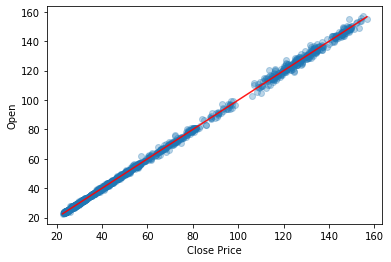

In [83]:
# Make sure that graphics appear inline in the iPython notebook 
%pylab inline 
# We pick 100 hundred points equally spaced from the min to the max 
X_prime = np.linspace(X.Close.min(), X.Close.max(), 100)[:, np.newaxis] 
X_prime = sm.add_constant(X_prime) 
# add constant as we did before 
# Now we calculate the predicted values 
y_hat = est.predict(X_prime) 
plt.scatter(X.Close, y, alpha=0.3) 
# Plot the raw data 
plt.xlabel("Close Price") 
plt.ylabel("Open") 
plt.plot(X_prime[:, 1], y_hat, 'r', alpha=0.9) 
# Add the regression line, colored in red Populating the interactive namespace from numpy and matplotlib

In [84]:
# formula: response ~ predictors 
est = smf.ols(formula='Open ~ Close', data=df).fit() 
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Open   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.279e+06
Date:                Sat, 23 Oct 2021   Prob (F-statistic):               0.00
Time:                        21:20:34   Log-Likelihood:                -2461.7
No. Observations:                1716   AIC:                             4927.
Df Residuals:                    1714   BIC:                             4938.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0062      0.046     -0.135      0.893      -0.096       0.084
Close          0.9996      0.001   1509.785      0.000       0.998       1.001
==============================================================================
Omnibus:                      366.038   Durbin-Watson:                   2.170
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4313.806
Skew:                           0.647   Prob(JB):                         0.00
Kurtosis:                      10.659   Cond. No.                         130.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""